### Linear Regression Implementation using Scikit learn

Regression analysis is the most widely used method of prediction. Linear regression is used when the dataset has a linear correlation and as the name suggests, simple linear regression has one independent variable (predictor) and one dependent variable(response).

The simple linear regression equation is represented as y = a+bx where x is the explanatory variable, y is the dependent variable, b is coefficient and a is the intercept.

For regression analysis, first we have to import libraries.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

After importing libraries, the dataset is to be imported. 

In [2]:
#Importing dataset
dataset = pd.read_csv('/kaggle/input/employee-salary-dataset/Salary_Data.csv.xls')

To see the first five rows of the dataset we can use dataset.head().

# Data Analysis

In [3]:
#To see first 5 rows of the dataset
dataset.head().style.background_gradient()

,YearsExperience,Salary
0,1.100000,39343.000000
1,1.300000,46205.000000
2,1.500000,37731.000000
3,2.000000,43525.000000
4,2.200000,39891.000000


In [4]:
# To see information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Both are numerical column

In [5]:
dataset.isnull().sum().sum()

0

There is no null value in dataset

Statistical analysis of the dataset like no: of observation, mean, standard deviation and interquartile value can be done using the dataset. describe().

In [6]:
#Statistical Analysis
dataset.describe().style.background_gradient()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


The relationship between variables can be seen by using sns.pairplot(). For multiple linear regression, it will be very useful, as it shows each feature's relationship with the response.

# Heat Map

In [7]:
fig = px.imshow(dataset.corr())
fig.show()

# Visualization

## Scatter Plot

In [8]:
scatter = [go.Scatter(x = dataset['YearsExperience'],
                      y = dataset['Salary'],
                      mode ='markers')] 

fig = go.Figure(scatter)

iplot(fig)

## histogram

In [9]:
hist = [go.Histogram(x = dataset['YearsExperience'],\
                     marker=dict(color ='#AFE400',line = dict(color='black',width=2)))]


fig = go.Figure(data = hist)

iplot(fig)

In [10]:
hist = [go.Histogram(x = dataset['Salary'],\
                     marker=dict(color ='#0FE400',line = dict(color='black',width=2)))]

fig = go.Figure(data = hist)

iplot(fig)

# Assigning dependent variable to y and independent variable to X.

In [11]:
#Assiging values in X & Y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


The dataset has to be split into a training set and a test set analysis. This can be done by the function train_test_split function from the Model_selection module of the Scikit-learn library.


# Spliting Dataset

In [14]:
#Splitting testdata into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=2)

Now the data set will be divided into X_train,X_test,y_train,y_test based on the test_size we have provided as input.

Here dataset has 30 observations and test_size is taken as 33% of the total observation. This indicates the test set should have 33% * 30 =9.9 ~10 observations and the training set should have 20 observations. Random_state is assigned to some value so that the dataset is split randomly.

In [15]:
print(X_train)

[[ 2.9]
 [ 9.6]
 [ 4. ]
 [ 2.2]
 [ 3.9]
 [ 5.1]
 [10.3]
 [ 9. ]
 [ 5.3]
 [ 1.5]
 [ 3.2]
 [ 9.5]
 [ 8.7]
 [ 5.9]
 [ 4. ]
 [ 7.9]
 [10.5]
 [ 4.1]
 [ 4.9]
 [ 3.2]]


In [16]:
print(X_test)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]


In [17]:
print(y_train)

[ 56642. 112635.  56957.  39891.  63218.  66029. 122391. 105582.  83088.
  37731.  54445. 116969. 109431.  81363.  55794. 101302. 121872.  57081.
  67938.  64445.]


In [18]:
print (y_test)

[ 46205.  39343.  61111.  57189.  98273.  93940. 113812.  60150.  43525.
  91738.]


random_state is provided as input to divide the test set and the training set randomly. If we use random_state as 47, then the dataset will be divided in a different random way.

# Linear Regression

To perform linear regression, LinearRegression class is imported from the module linear_model of the Scikit-learn library. The simple regression model built will be an instance of class LinearRegression.

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Predict

In [20]:
#Prediciting Y from Linear regression Model
y_pred = lr.predict(X_test)

Traning data is visualized with X_train and y_train, the red mark indicates the data point and the blue line indicates the regression line or best fit line.

# ScatterPlot

In [21]:
x_range = np.linspace(X.min(), X.max(), 100)
y_range = lr.predict(x_range.reshape(-1, 1))

fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])

fig.show()

# Coefficient and Intercept 

To find the linear regression equation, coefficient and intercept are to be calculated which can be done with the below equation.

In [22]:
#Assigning Coefficient (slope) to b
b = lr.coef_

In [23]:
print("Coefficient  :" , b)

Coefficient  : [9512.94498763]


In [24]:
#Assigning Y-intercept to a
a = lr.intercept_

In [25]:
print("Intercept : ", a)

Intercept :  23707.81324657549


# Predicting Unknown Values

For this model, the linear regression equation will be:

Predicted Salary=Coefficient × (years of experience) + Intercept 

For Years of Experience 11, predicted salary can be calculated as:

_ × (11) + _ = _

y(11) can be predicted with the model as below.


In [26]:
# y_pred=9426.03876907×(years of experience)+25324.33537924433
#y_predict(11)
print(lr.predict([[11]]))

[128350.20811048]


Mean Squared Error (MSE) is one of the regression evaluation metrics. It is calculated as the average squared difference between the predicted values and the real value. The mathematical equation for MSE is as:
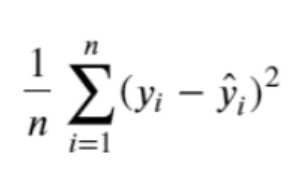

MSE can be calculated from the metrics module of Scikit-learn library.

# Evaluation

In [27]:
#Mean Squared Error (MSE)
from sklearn import metrics

In [28]:
print('Mean Squared Error (MSE)  : ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE)  :  60451409.832681164


In [29]:
import statsmodels.api as sm

Ordinary Least-Squares (OLS) estimator module can be called from statsmodels.api to get regression summary.

In [30]:
X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     616.8
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           2.23e-15
Time:                        20:55:43   Log-Likelihood:                -197.13
No. Observations:                  20   AIC:                             398.3
Df Residuals:                      18   BIC:                             400.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.371e+04   2468.760      9.603      0.000    1.85e+04    2.89e+04
x1          9512.9450    383.048     24.835      0.000    8708.190    1.03e+04
==============================================================================
Omnibus:                        1.535   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.193
Skew:                           0.567   Prob(JB):                        0.551
Kurtosis:                       2.616   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Square or Adj-R-Square value can be obtained as below.

In [31]:
print("Adjusted R-Square : ",regsummary.rsquared_adj)
print("R-Square : ",regsummary.rsquared)

Adjusted R-Square :  0.9700678765774073
R-Square :  0.9716432514943859


If only interested to find the R-Square value, r2_score can be imported from the metrics module of the Scikit-learn library.

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_train, lr.predict(X_train))

0.9716432514943859